<a href="https://colab.research.google.com/github/italo-gadelha/notebook-senai/blob/main/qualidade_sono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/

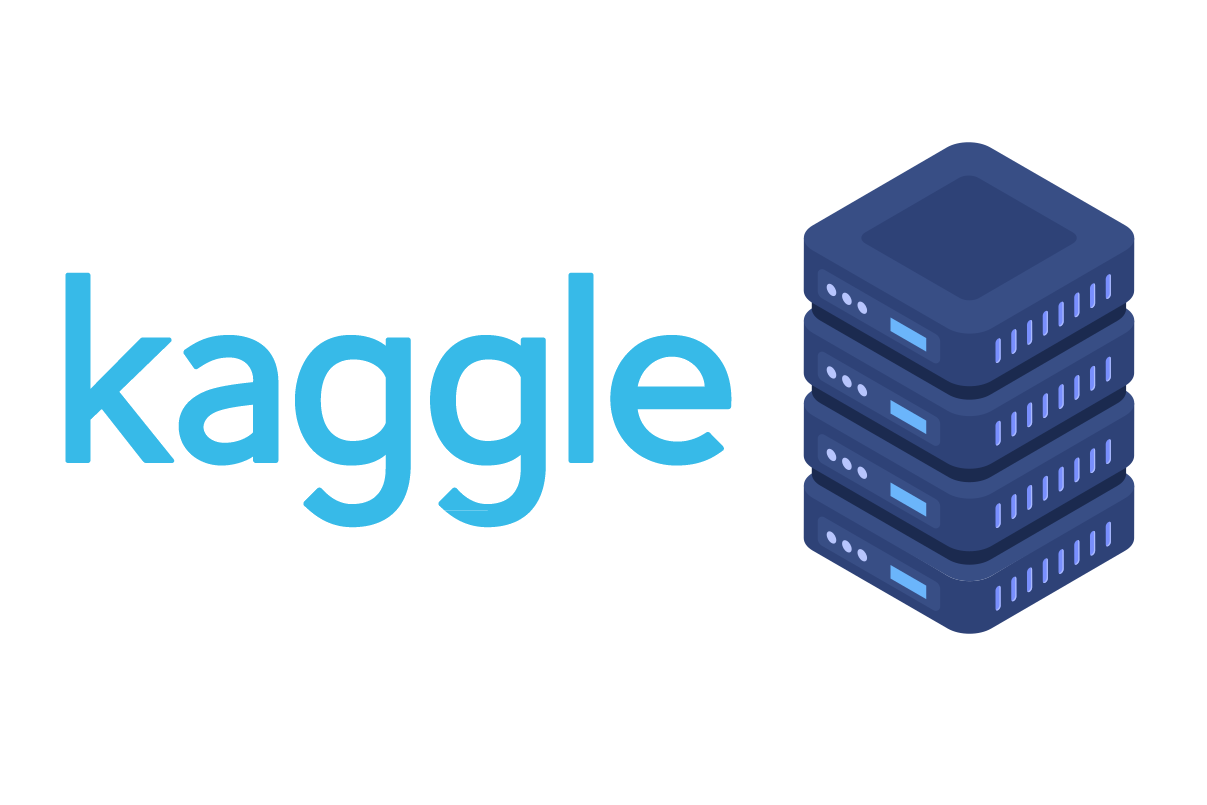

## Problema : A Qualidade de Sono relacionada a um Estilo de Vida Saudável.
Dormimos cerca de um terço de nossas vidas. Contudo, muitos de nós não atingem essa quantidade ideal de sono. Aqui estão as informações essenciais sobre o sono.


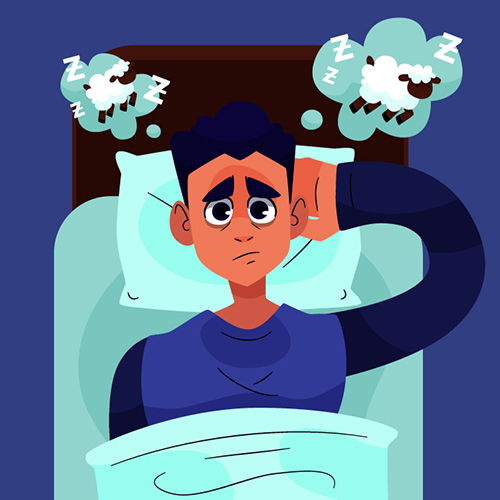

## Solução do problema:
Aplicando os modelos de aprendizado de máquina e treinando com um conjunto de dados.

Após o treinamento, eles são avaliados usando outro conjunto de dados para testar sua precisão.

O classificador então faz uma previsão sobre a possibilidade de uma pessoa ter distúrbios do sono, com base nas informações fornecidas.


## Informações do Dataset:

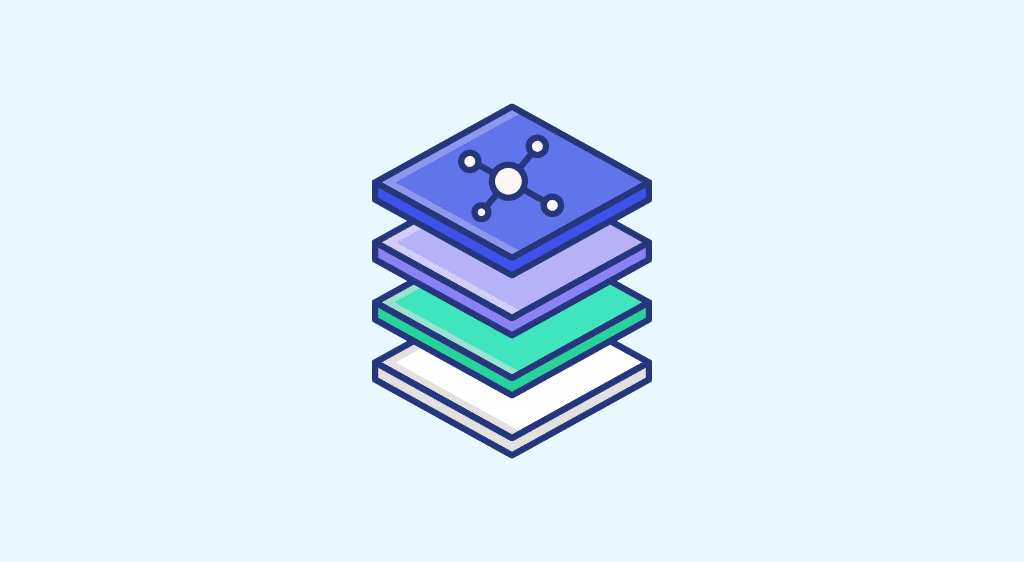

**Dataset Columns:**

**Person ID**: um identificador para cada indivíduo.

**Gender**: O gênero da pessoa  (Masculino/Feminino).

**Age**: A idade da pessoa em anos.

**Occupation**: A ocupação ou profissão da pessoa.

**Sleep Duration (hours)**: o número de horas que a pessoa dorme por dia.

**Quality of Sleep (scale: 1-10)**: Uma classificação subjetiva da qualidade do sono, variando de 1 a 10.

**Physical Activity Level (minutes/day)**: Número de minutos que a pessoa pratica atividade física diariamente.

**Stress Level (scale: 1-10)**: Uma classificação subjetiva do nível de estresse vivenciado pela pessoa, variando de 1 a 10.

**BMI Category**: A categoria de IMC da pessoa (por exemplo, Abaixo do Peso, Normal, Sobrepeso).

**Blood Pressure (systolic/diastolic)**: A medição da pressão arterial da pessoa, indicada como pressão sistólica sobre pressão diastólica.

**Heart Rate (bpm)**: A frequência cardíaca em repouso da pessoa em batimentos por minuto.

**Daily Steps**: O número de passos que a pessoa dá por dia.

**Sleep Disorder**: A presença ou ausência de um distúrbio do sono na pessoa (Nenhum, Insônia, Apneia do Sono).

## Variáveis


### Quantitativas:


Age: A idade da pessoa em anos.

Sleep Duration (hours): o número de horas que a pessoa dorme por dia.

Quality of Sleep (scale: 1-10): Uma classificação subjetiva da qualidade do sono, variando de 1 a 10.

Physical Activity Level (minutes/day): Número de minutos que a pessoa pratica atividade física diariamente.

Stress Level (scale: 1-10): Uma classificação subjetiva do nível de estresse vivenciado pela pessoa, variando de 1 a 10.

Blood Pressure (systolic/diastolic): A medição da pressão arterial da pessoa, indicada como pressão sistólica sobre pressão diastólica.

Heart Rate (bpm): A frequência cardíaca em repouso da pessoa em batimentos por minuto.

Daily Steps: O número de passos que a pessoa dá por dia.

### Qualitativas:
Gender: O gênero da pessoa (Masculino/Feminino).

Occupation: A ocupação ou profissão da pessoa.

BMI Category: A categoria de IMC da pessoa (por exemplo, Abaixo do Peso, Normal, Sobrepeso).

Sleep Disorder: A presença ou ausência de um distúrbio do sono na pessoa (Nenhum, Insônia, Apneia do Sono).

## Importando Bibliotecas para o Projeto

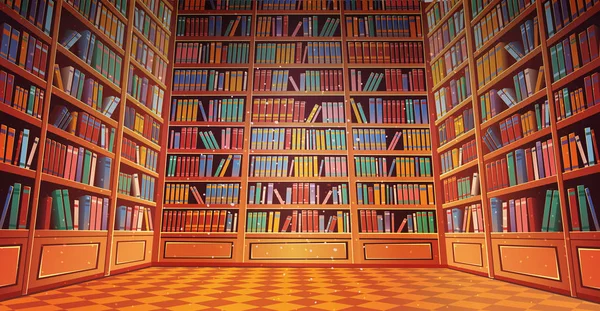

In [ ]:
# Importando o pandas para leitura do dataset
import pandas as pd

In [ ]:
# Importando Seaborn, Plotly, Matplotlib para visualização e gráficos
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [ ]:
# Importando numpy para operações matemáticas
import numpy as np

In [ ]:
# Biblioteca para o test split
from sklearn.model_selection import train_test_split

In [ ]:
# Curva ROC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

## Iniciando o projeto

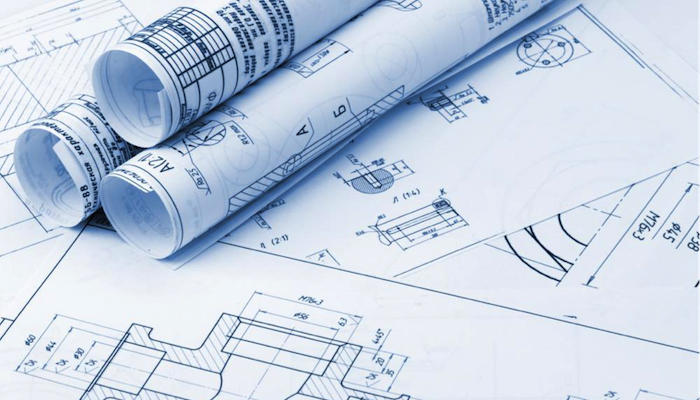

In [ ]:
# Importando o Dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
# Verificando se as colunas batem com a documentação do Dataset
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
# Substituindo o valor NaN na coluna Sleep Disorder por Nenhum

df['Sleep Disorder'] = df['Sleep Disorder'].replace(np.nan, 'Nenhum')

In [ ]:
# Verificando a quantidade de linhas e colunas
df.shape

(374, 13)

#### O dataset contém **374 Linhas e 13 Colunas**

obs do professor : get dummies para mapear variaveis categoricas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Não há valores **nulos** no dataset | Contém 5 colunas com Dtype Object(**String**) | A outras colunas 8 contém valores **Inteiros**


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# Análise Exploratória de Dados(EDA)

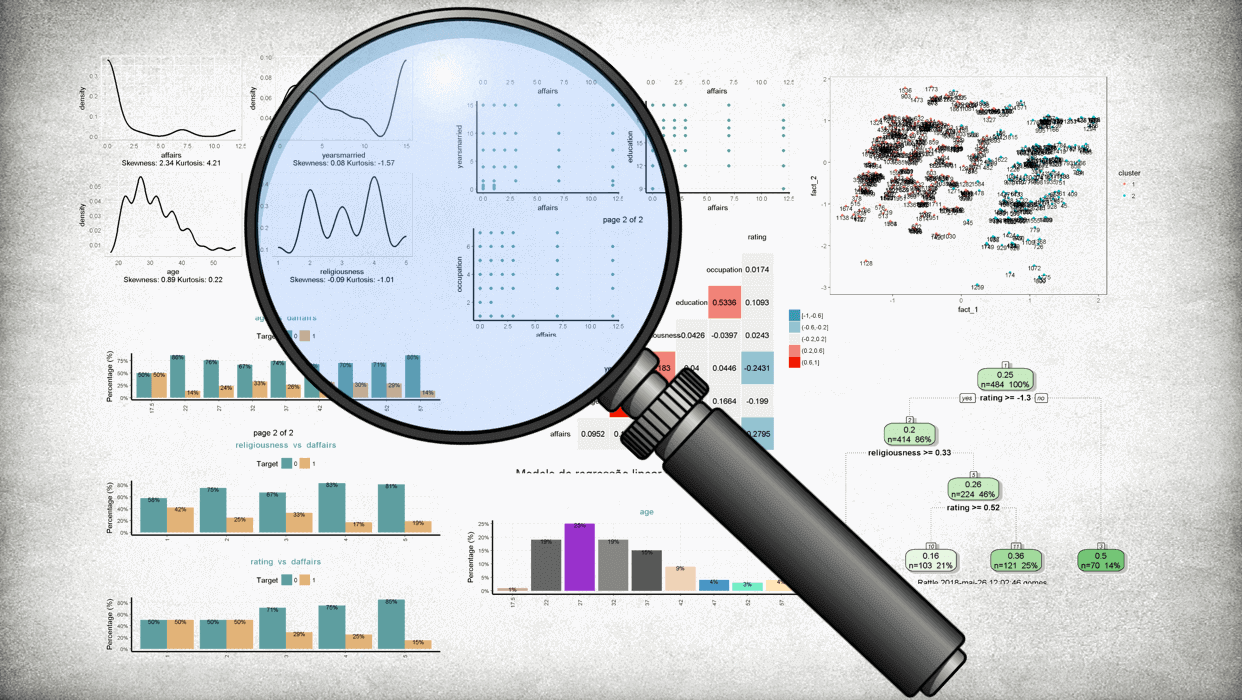

In [ ]:
# Exibindo as colunas
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
# Contar o número de elementos distintos no eixo especificado.
df.nunique()

,0
Person ID,374
Gender,2
Age,31
Occupation,11
Sleep Duration,27
Quality of Sleep,6
Physical Activity Level,16
Stress Level,6
BMI Category,4
Blood Pressure,25


In [ ]:
plt.style.use('dark_background')

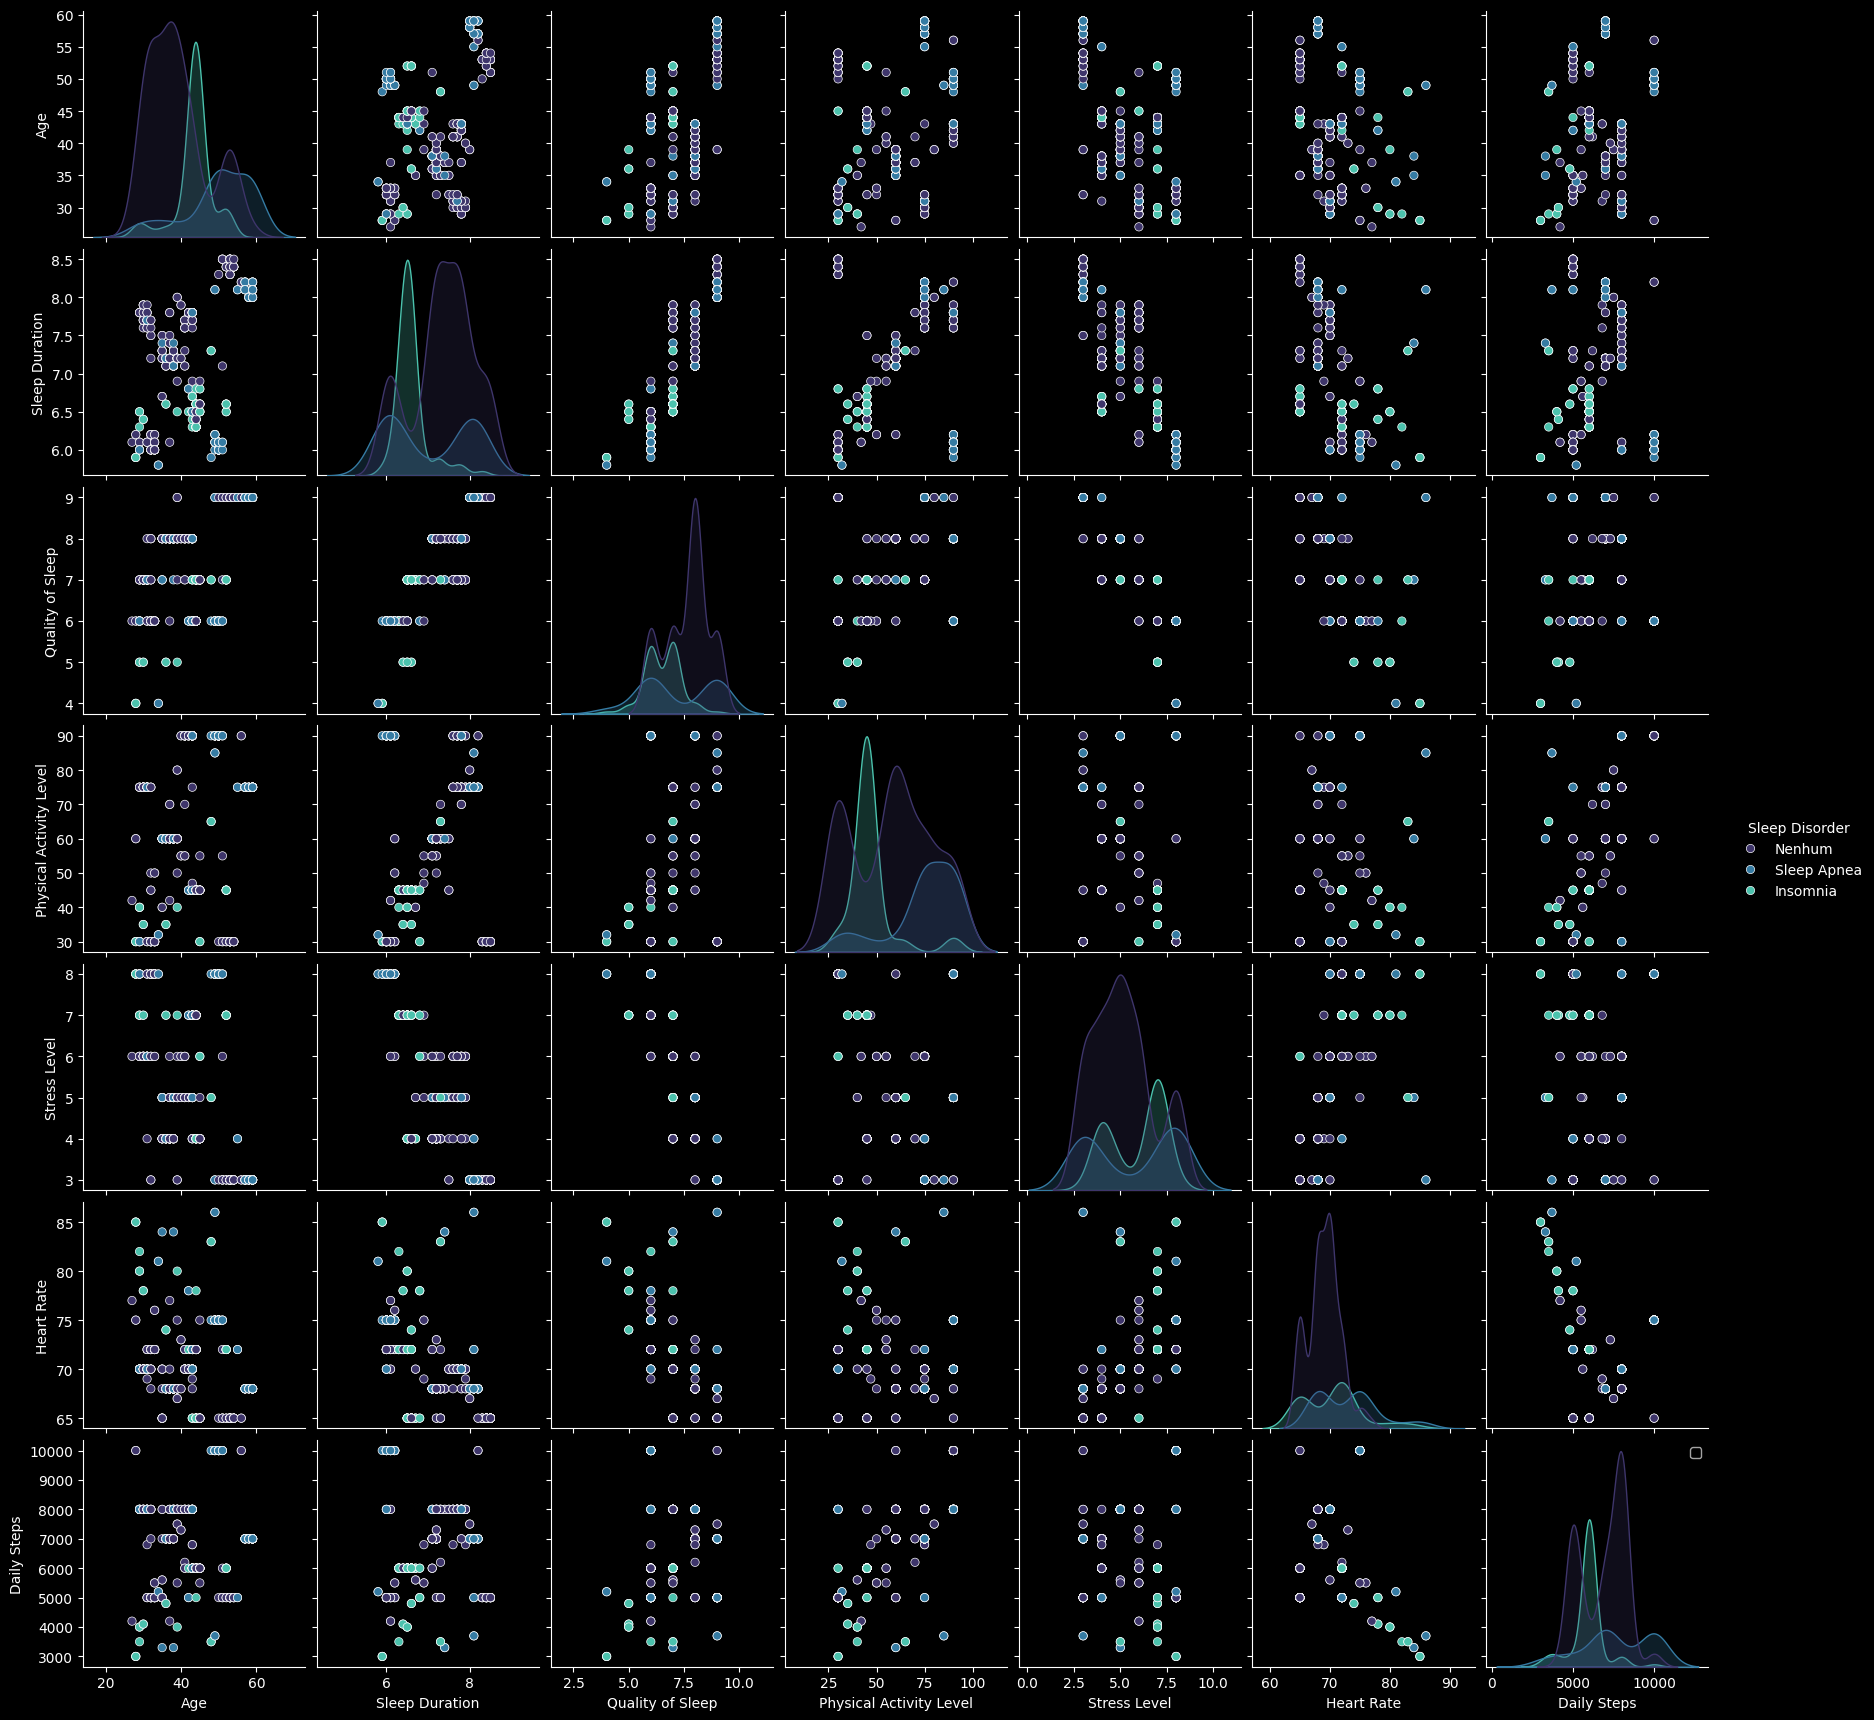

In [ ]:
sns.pairplot(data=df.drop('Person ID',axis=1),hue='Sleep Disorder',palette='mako')
plt.legend()
plt.show()

In [ ]:
df['Sleep Disorder'].unique()

array(['Nenhum', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [ ]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
Nenhum,219
Sleep Apnea,78
Insomnia,77


**É notório que a quantidade de pessoas sem problema disturbio no sono é a maioria**

In [ ]:
fig=px.histogram(df,x='Sleep Disorder', barmode="group",color='Sleep Disorder', color_discrete_sequence=['white','#4A235A','#C39BD3'], text_auto=True)
fig.update_layout(title='<b>Distribuição de pessoas por Distúrbio do Sono</b>',
                 title_font={'size':18},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0',
                 showlegend=True,
                 width=1000,
                 height=600)
fig.update_yaxes(showgrid=False)

fig.show()

## Agrupando os Disturbios de sono por genêro


In [ ]:
df.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
Nenhum          Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64

**É notório as seguintes observações:**

A **Insônia** e a **Apneia de Sono** nesse dataset foi mais comum em Mulheres.


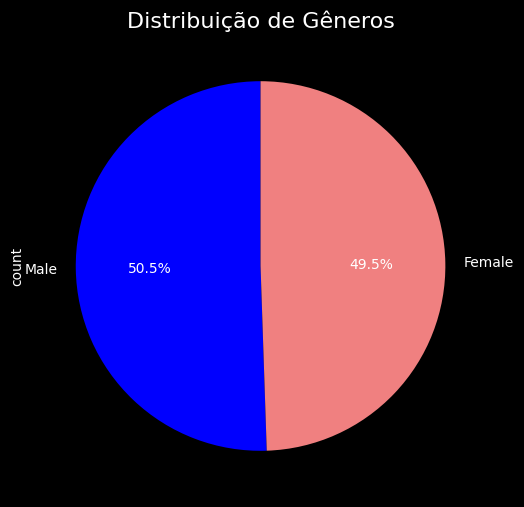

In [ ]:
# Gráfico Pizza da distribuição de Gêneros
df['Gender'].value_counts().plot.pie(autopct ='%1.1f%%',figsize=(12,6),colors=['blue','lightcoral'],startangle=90)
plt.title('Distribuição de Gêneros', fontsize=16)

plt.show()

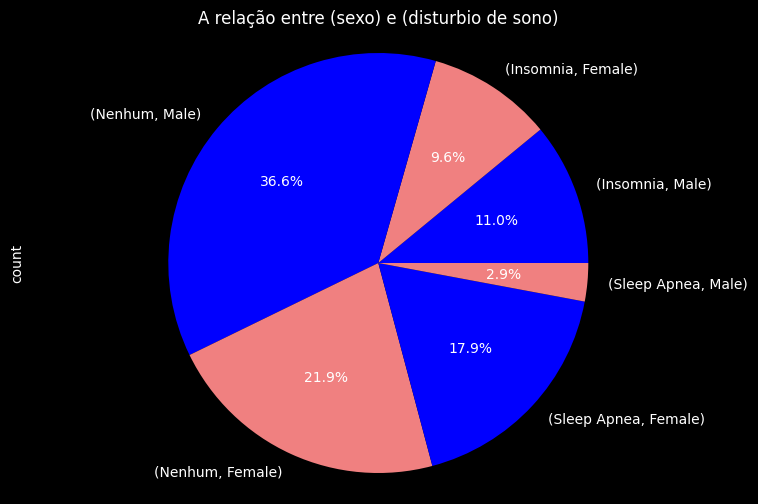

In [ ]:
# Gráfico Pizza da distribuição de Disturbio de Sono por Gêneros
df.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%',figsize=(9,6),colors=['blue','lightcoral','blue','lightcoral','blue','lightcoral'])
plt.title('A relação entre (sexo) e (disturbio de sono)')
plt.axis('equal')

plt.show()

## Agrupando os Disturbios de sono por ocupações

In [ ]:
df.groupby('Sleep Disorder')['Occupation'].value_counts()

Sleep Disorder  Occupation          
Insomnia        Salesperson             29
                Teacher                 27
                Accountant               7
                Engineer                 5
                Doctor                   3
                Nurse                    3
                Lawyer                   2
                Software Engineer        1
Nenhum          Doctor                  64
                Engineer                57
                Lawyer                  42
                Accountant              30
                Nurse                    9
                Teacher                  9
                Software Engineer        3
                Salesperson              2
                Scientist                2
                Manager                  1
Sleep Apnea     Nurse                   61
                Doctor                   4
                Teacher                  4
                Lawyer                   3
                Sales Representative     2
                Scientist                2
                Engineer                 1
                Salesperson              1
Name: count, dtype: int64

#### É notório as seguintes observações:


Doutor(Doctor) possuí menos ou **Nenhum** problema de sono que os demais.

Vendedores(Salesperson) sofrem mais de **Insônia** que os demais.

Enfermeiro(Nurse) sofrem mais de **Apneia de Sono** que os demais.

In [ ]:
fig=px.treemap(df,path=[px.Constant('Jobs'),'Sleep Disorder','Occupation'], color='Sleep Disorder',color_discrete_sequence=['#EBDEF0','#C39BD3','#4A235A'])
fig.update_layout(title='<b> O efeito do trabalho no sono</b>',title_font={'size':18})

fig.show()

## O efeito da Qualidade do Sono no Distúrbio de Sono

**Qualidade do Sono (escala: 1-10): Uma classificação subjetiva da qualidade do sono, variando de 1 a 10.**

In [ ]:
df.pivot_table(index='Quality of Sleep',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).style.background_gradient(cmap='BuPu')

In [ ]:
fig=px.sunburst(df,path=[px.Constant('Sleep quality'),'Sleep Disorder','Quality of Sleep'],color='Sleep Disorder',values='Sleep Duration', color_discrete_sequence=['pink','#C39BD3','#4A235A'], hover_data=['Gender'])
fig.update_layout(title='<b>O efeito da Qualidade do Sono no Distúrbio de Sono </b>',title_font={'size':18})

fig.show()

## O efeito da Idade sobre o Distúrbio de Sono

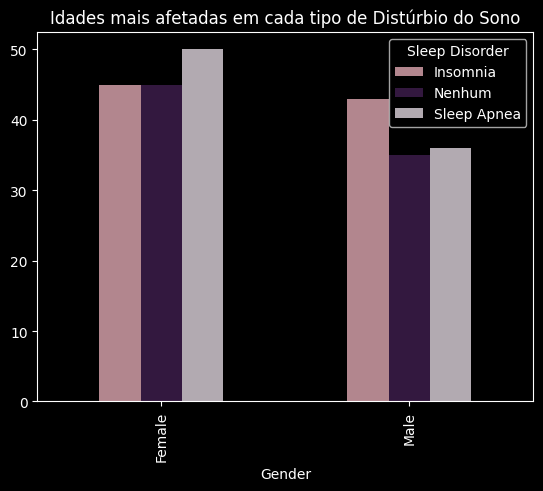

In [ ]:
df.pivot_table(index='Gender',columns='Sleep Disorder',values='Age',aggfunc='median').plot(kind='bar',color={'#FFF3FD','#4A235A','pink'},title='Idades mais afetadas em cada tipo de Distúrbio do Sono', label='Age',alpha=.7)


plt.show()

In [ ]:
fig=px.ecdf(df,x='Age',color='Sleep Disorder',color_discrete_sequence=['white','#4A235A','#C39BD3'])
fig.update_layout(title='<b>O efeito da Idade sobre o Distúrbio de Sono </b>', title_font={'size':18}, paper_bgcolor='#EBDEF0', plot_bgcolor='#EBDEF0')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)


fig.show()

## O efeito da Duração do Sono no Distúrbio do Sono

In [ ]:
fig=px.histogram(df,x='Sleep Disorder',y='Sleep Duration', color='Sleep Disorder',color_discrete_sequence=['white','#4A235A','#C39BD3'],text_auto=True)
fig.update_layout(title='<b>O efeito da Duração do Sono no Distúrbio do Sono</b>', titlefont={'size': 18,'family': 'Serif'},showlegend=True,paper_bgcolor='#EBDEF0',plot_bgcolor='#EBDEF0')
fig.update_yaxes(showgrid=False)

fig.show()

## A relação entre (categoria de IMC, pressão arterial e frequência cardíaca) e seu efeito no distúrbio do sono

In [ ]:
fig=px.scatter_3d(df,x='BMI Category',y='Blood Pressure',z='Heart Rate',color='Sleep Disorder',width=1000,height=900, color_discrete_sequence=['white','#4A235A','#C39BD3'])
fig.update_layout(title='<b>A relação entre (categoria de IMC, pressão arterial e frequência cardíaca) e seu efeito no distúrbio do sono</b>',titlefont={'size': 20,'family': 'Serif'},showlegend=True)



fig.show()

In [ ]:
df.pivot_table(index='Stress Level',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).style.background_gradient(cmap='BuPu')

## O efeito do Nível de Estresse no Distúrbio do Sono

**Stress Level (scale: 1-10): Uma classificação subjetiva do nível de estresse vivenciado pela pessoa, variando de 1 a 10.**

In [ ]:
fig=px.histogram(df,x='Sleep Disorder',
                 color='Sleep Disorder',
                 facet_col='Stress Level',
                 barmode='group',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 opacity=.8)


fig.update_layout(title='<b>O efeito do Nível de Estresse no Distúrbio do Sono</b>',title_font={'size':30},
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')



fig.update_yaxes(showgrid=False)
fig.show()

## O efeito do IMC da pessoa no Distúrbio do Sono

**BMI Category: A categoria de IMC da pessoa (por exemplo, Abaixo do Peso, Normal, Sobrepeso).**

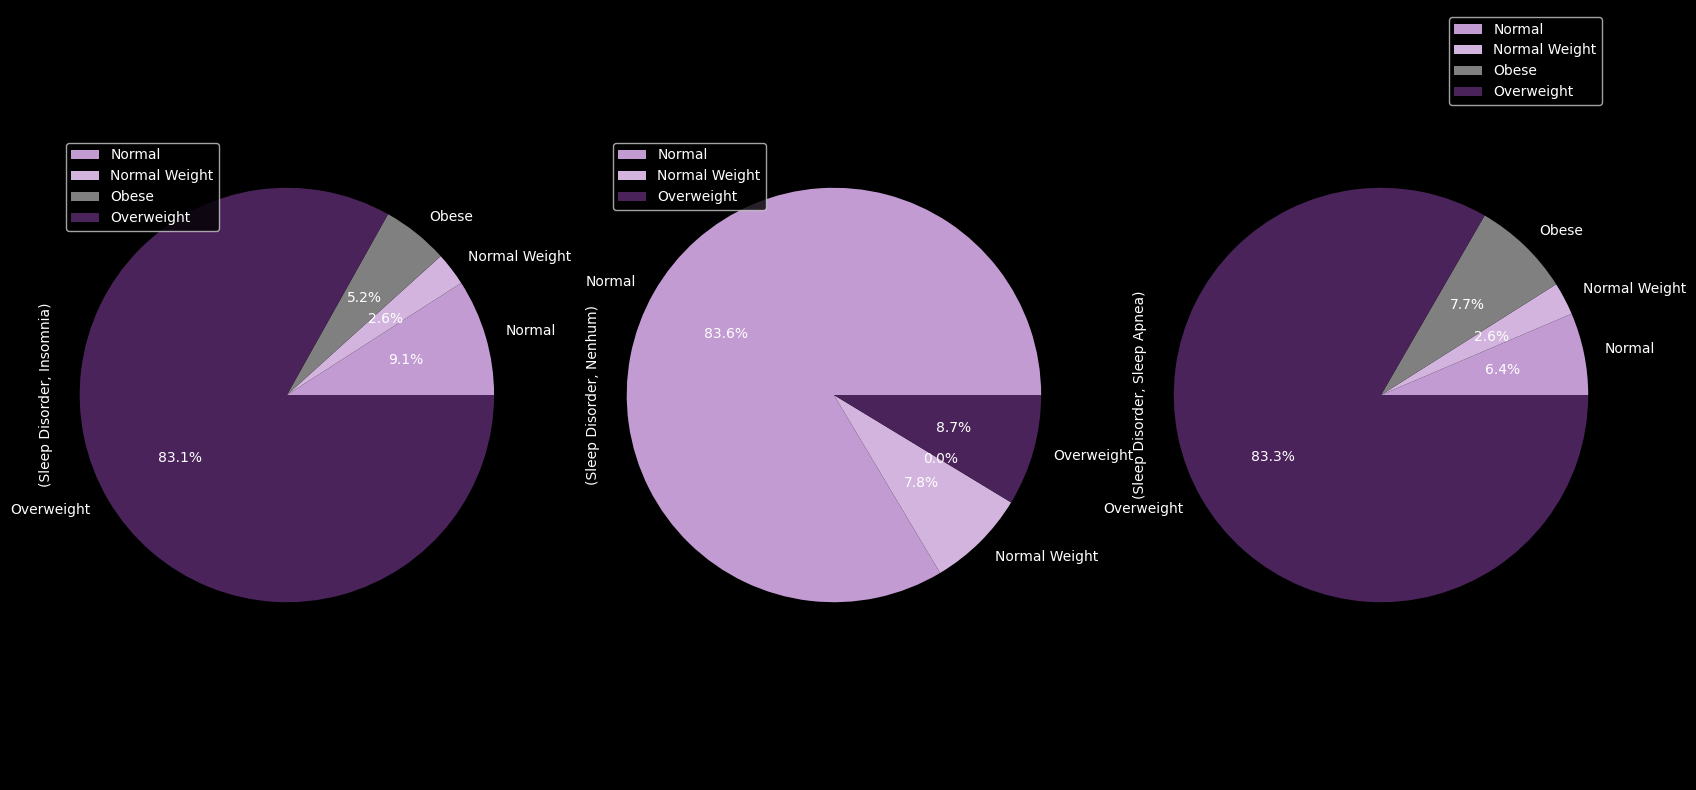

In [ ]:
df.pivot_table(index='BMI Category',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).plot.pie(autopct ='%1.1f%%',subplots=True,figsize=(20,10),colors=['#C39BD3','#D2B4DE','gray','#4A235A'])

plt.axis('equal')
plt.show()

# Processamento de Dados

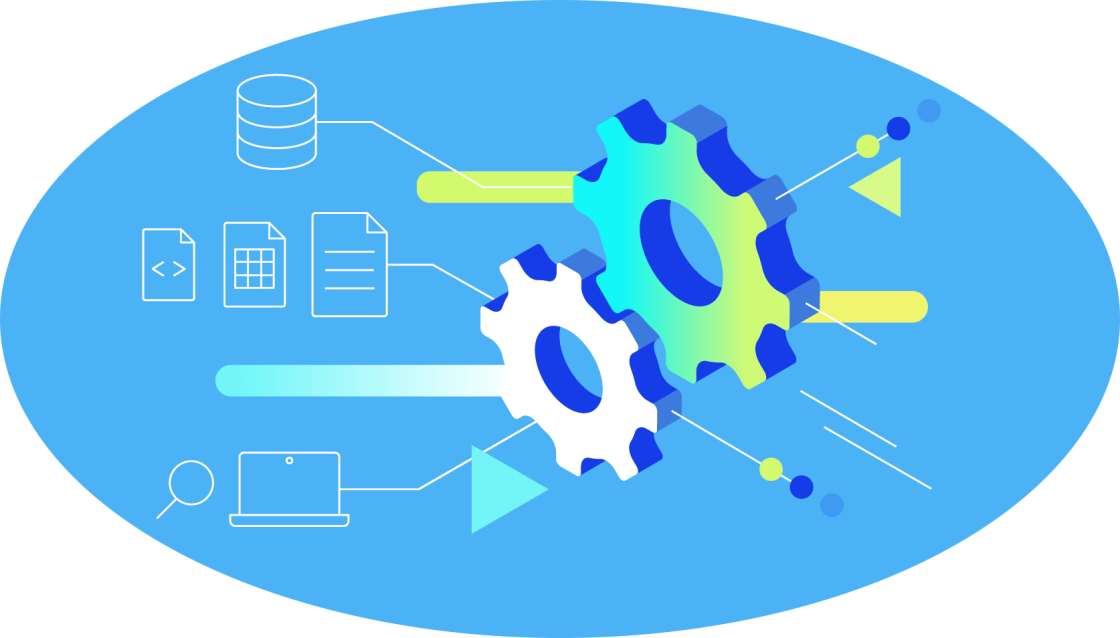

In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)


Pressão arterial ideal -  sistólica (número superior): menos de 120, diastólica (número inferior): menos de 80

Sistólica normal (número superior): na faixa (120 - 129), diastólica (número inferior): na faixa (80 - 84)

Caso contrário, a pressão arterial estará alta

In [ ]:
df['Blood Pressure']=df['Blood Pressure'].apply(lambda x:0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] else 1)
# 0 = Pressão normal
# 1 = Pressão anormal

https://pandas.pydata.org/docs/reference/api/pandas.cut.html

`pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)`



Use **cut** quando precisar segmentar e classificar valores de dados em compartimentos. Esta função também é útil para passar de uma variável contínua para uma variável categórica. Por exemplo, o corte poderia converter idades em grupos de faixas etárias. Suporta categorização em um número igual de caixas ou em uma matriz pré-especificada de caixas.

In [ ]:
df["Age"]=pd.cut(df["Age"],2)
df["Heart Rate"]=pd.cut(df["Heart Rate"],4)
df["Daily Steps"]=pd.cut(df["Daily Steps"],4)
df["Sleep Duration"]=pd.cut(df["Sleep Duration"],3)
df["Physical Activity Level"]=pd.cut(df["Physical Activity Level"],4)

In [ ]:
# converter dados não numéricos (String ou Booleano) em números
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

categories=['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI Category','Heart Rate','Daily Steps','Sleep Disorder']
for label in categories:
    df[label]=LE.fit_transform(df[label])

In [ ]:
# dropando a coluna Person ID
df.drop(['Person ID'], axis=1, inplace=True)

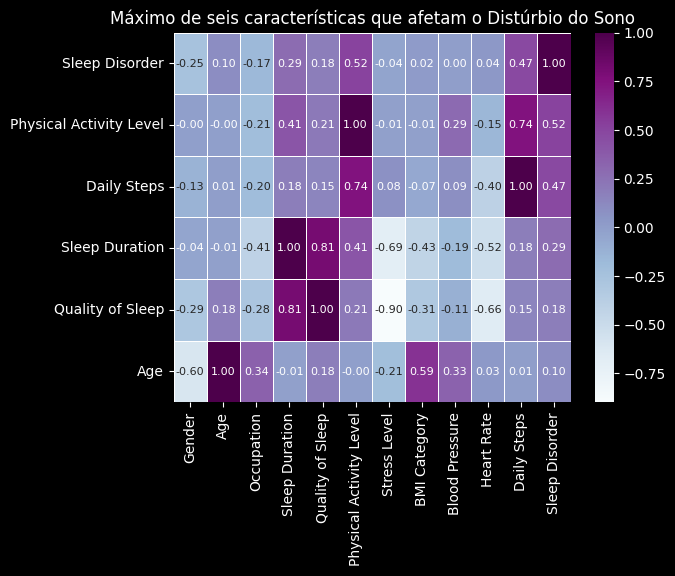

In [ ]:
# correlação
correlation=df.corr()
max_6_corr=correlation.nlargest(6,"Sleep Disorder")
sns.heatmap(max_6_corr,annot=True,fmt=".2F",annot_kws={"size":8},linewidths=0.5,cmap='BuPu')
plt.title('Máximo de seis características que afetam o Distúrbio do Sono')
plt.show()

# 70/30 - Treino

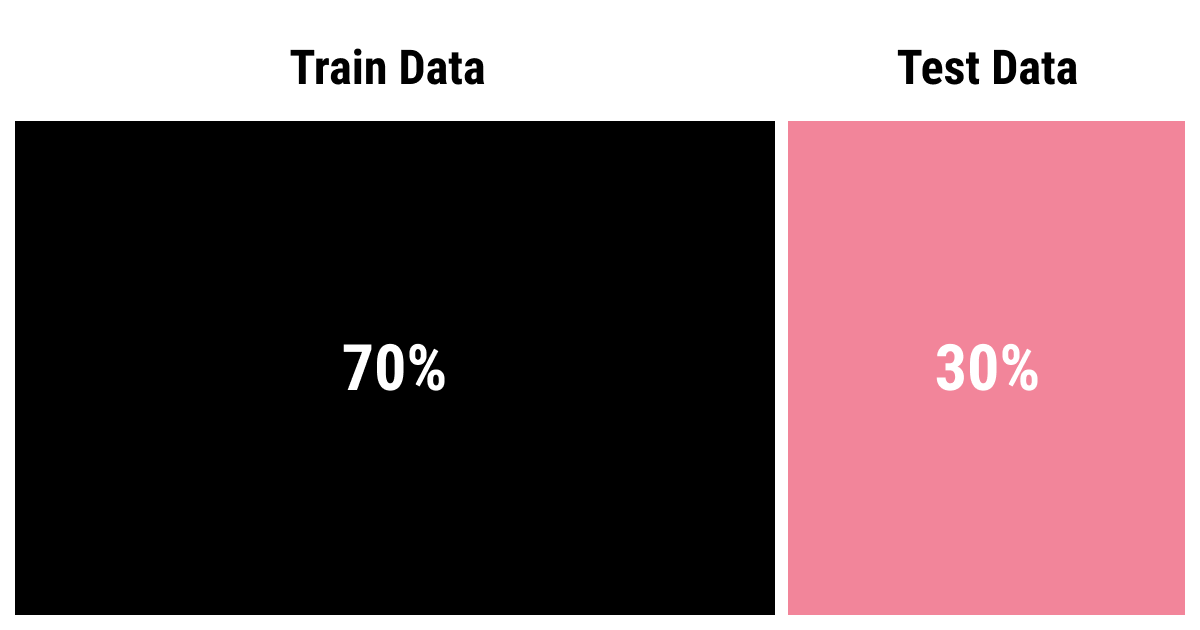

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

x_shape= x.shape
y_shape= y.shape
print('Dimensão de x : ',x_shape)
print('Dimensão de y : ',y_shape)

Dimensão de x :  (374, 11)
Dimensão de y :  (374,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=32,shuffle=True)

In [ ]:
x_train_shape=x_train.shape
x_test_shape=x_test.shape
y_train_shape=y_train.shape
y_test_shape=y_test.shape

print("x train dimensão :",x_train_shape)
print("x test dimensão: ",x_test_shape)
print("y train dimensão :",y_train_shape)
print("y test dimensão :",y_test_shape)

x train dimensão : (261, 11)
x test dimensão:  (113, 11)
y train dimensão : (261,)
y test dimensão : (113,)


# **Modelagem de Dados**

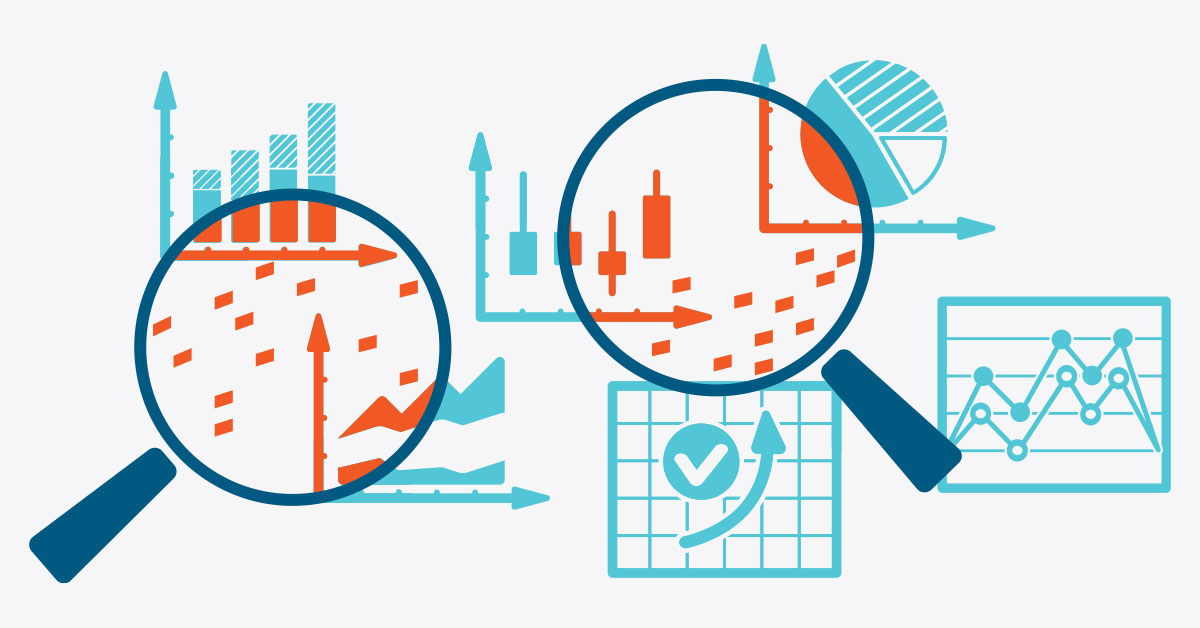

In [ ]:
from sklearn.linear_model import LogisticRegression
modelo=LogisticRegression(solver='lbfgs', max_iter=1000).fit(x_train,y_train)

## **Acurácia:**

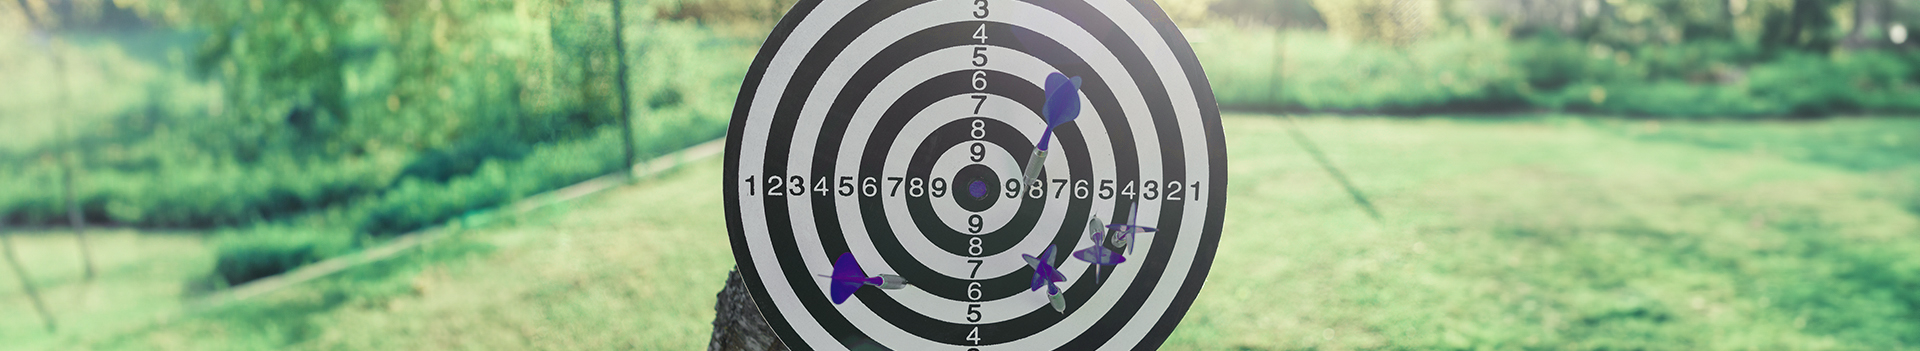

In [ ]:
modelo_training_score=round(modelo.score(x_train,y_train)*100,2)
modelo_testing_score=round(modelo.score(x_test,y_test)*100,2)

print(f"Regressão Logística training score :",modelo_training_score)
print(f"Regressão Logística testing score :",modelo_testing_score)

Regressão Logística training score : 91.19
Regressão Logística testing score : 91.15


**Acurácia de treino 91.19% e teste de 91.15%**

```
Regressão Logística training score : 91.19
Regressão Logística testing score : 91.15
```



In [ ]:
# Estatísticas descritivas do modelo
print("Estatísticas descritivas do modelo de Regressão Logística:")
print(f"- Acurácia de treino: {modelo_training_score}%")
print(f"- Acurácia de teste: {modelo_testing_score}%")

Estatísticas descritivas do modelo de Regressão Logística:
- Acurácia de treino: 91.19%
- Acurácia de teste: 91.15%


In [ ]:
# Analisando as variáveis mais importantes para o modelo
coefficients = modelo.coef_[0]
feature_importance = pd.DataFrame({'feature': x.columns, 'coefficient': coefficients})
feature_importance = feature_importance.sort_values('coefficient', ascending=False)
print("\nVariáveis mais importantes para o modelo:")
feature_importance


Variáveis mais importantes para o modelo:


,feature,coefficient
8,Blood Pressure,1.388107
0,Gender,0.819718
1,Age,0.497745
7,BMI Category,0.230645
6,Stress Level,0.161982
4,Quality of Sleep,0.028919
5,Physical Activity Level,-0.029611
2,Occupation,-0.030413
3,Sleep Duration,-0.796099
9,Heart Rate,-0.811290


## **Matriz Confusão:**

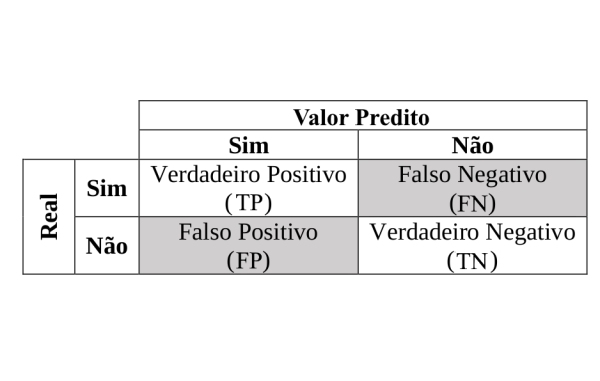

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
modelo_y_pred=modelo.predict(x_test)

In [ ]:
models_predictions=modelo_y_pred
model=['modelo_y_pred']

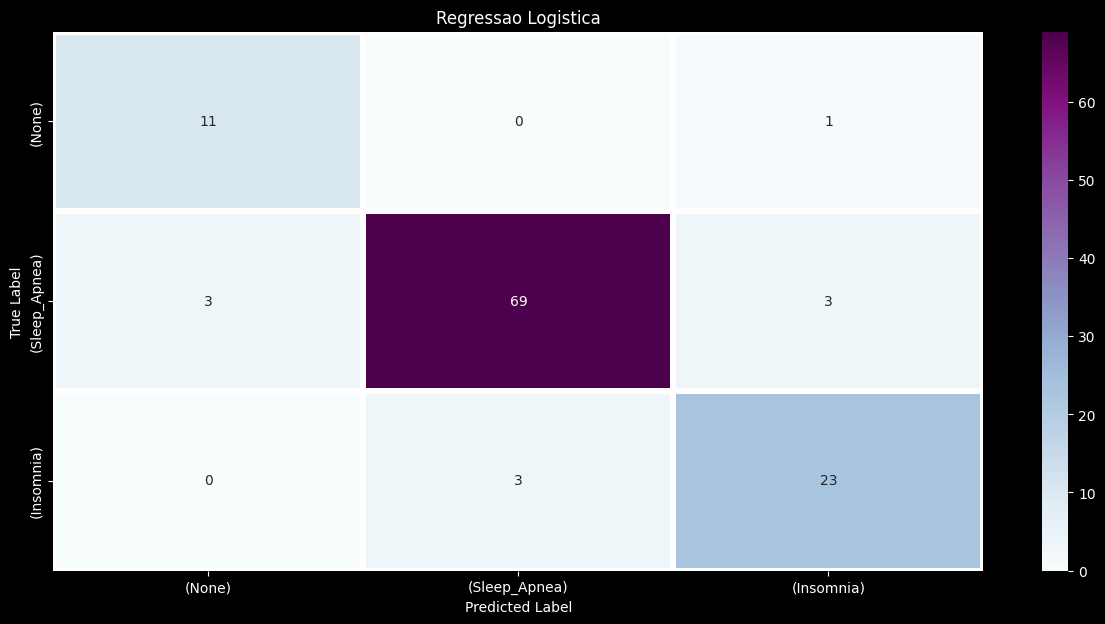

In [ ]:
plt.figure(figsize=(15,7))
cm = confusion_matrix(modelo_y_pred,y_test)

sns.heatmap(cm,cmap='BuPu',linewidth=3,fmt='',annot=True,
                xticklabels=['(None)','(Sleep_Apnea)','(Insomnia)'],
                yticklabels=['(None)','(Sleep_Apnea)','(Insomnia)'])


plt.title('Regressao Logistica')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.subplots_adjust(hspace=0.5,wspace=0.5)

## **Curva ROC**

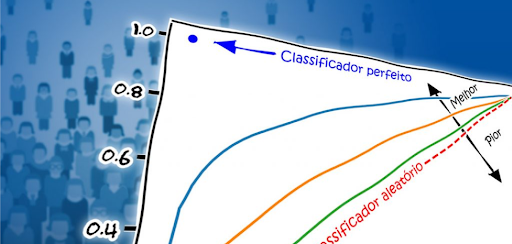

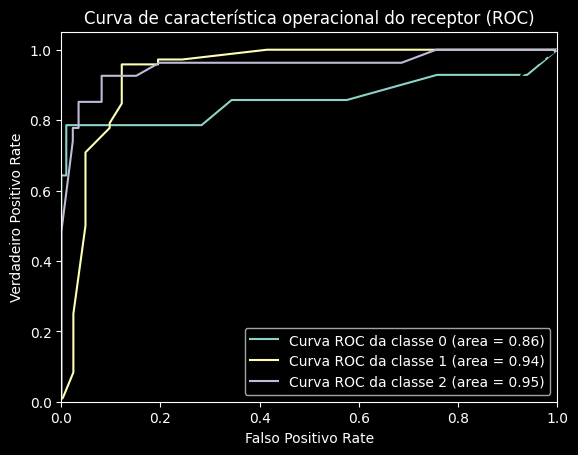

In [ ]:
# Binarizar os rótulos para curva ROC multiclasse
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_prob = modelo.predict_proba(x_test)

# Calcule a curva ROC e a área ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

# Traçar curva ROC para cada classe
plt.figure()
for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], label='Curva ROC da classe {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo Rate')
plt.ylabel('Verdadeiro Positivo Rate')
plt.title('Curva de característica operacional do receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

**Acurácia da Curva ROC**

In [ ]:
# Acurácia
average_roc_auc = np.mean(list(roc_auc.values()))
print(f"Média ROC AUC: {average_roc_auc:.2f}")

Média ROC AUC: 0.92


`92%`

## Hiperparâmetros

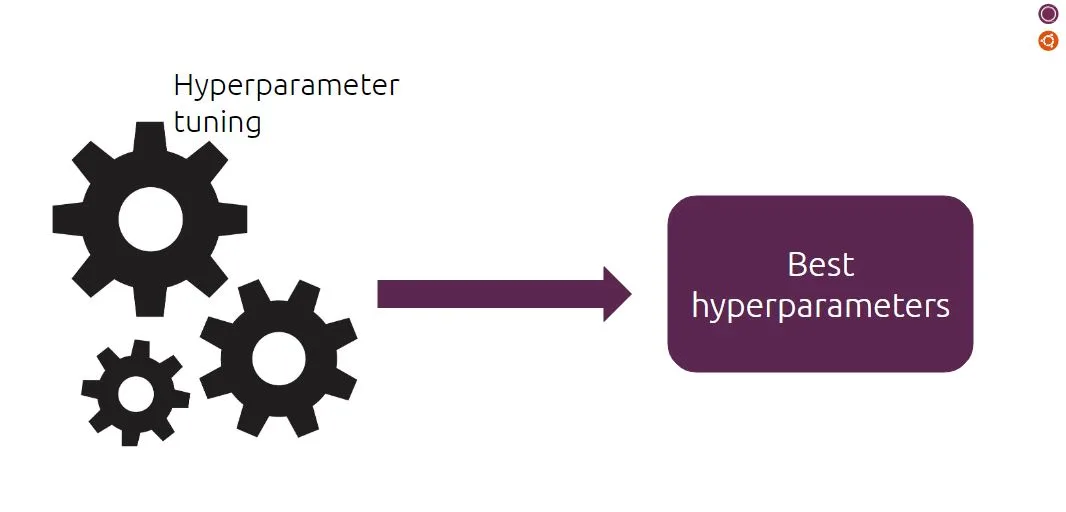

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],
    "max_iter": [100, 500, 1000],
}

# Create a Logistic Regression model
model = LogisticRegression()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_model = LogisticRegression(**grid_search.best_params_)
best_model.fit(x_train, y_train)

# Evaluate the model with the best hyperparameters
best_model_training_score = round(best_model.score(x_train, y_train) * 100, 2)
best_model_testing_score = round(best_model.score(x_test, y_test) * 100, 2)

print(f"Logistic Regression (Tuned) training score: {best_model_training_score}")
print(f"Logistic Regression (Tuned) testing score: {best_model_testing_score}")

# Evaluate the previous model (without hyperparameter tuning)
modelo_training_score = round(modelo.score(x_train, y_train) * 100, 2)
modelo_testing_score = round(modelo.score(x_test, y_test) * 100, 2)

print(f"Logistic Regression (Original) training score: {modelo_training_score}")
print(f"Logistic Regression (Original) testing score: {modelo_testing_score}")

# Compare the performance of the tuned model with the original model
print("\nModel Comparison:")
print(
    f"- Tuned Model Training Score: {best_model_training_score}%, Original Model Training Score: {modelo_training_score}%"
)
print(
    f"- Tuned Model Testing Score: {best_model_testing_score}%, Original Model Testing Score: {modelo_testing_score}%"
)

Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression (Tuned) training score: 91.57
Logistic Regression (Tuned) testing score: 91.15
Logistic Regression (Original) training score: 91.19
Logistic Regression (Original) testing score: 91.15

Model Comparison:
- Tuned Model Training Score: 91.57%, Original Model Training Score: 91.19%
- Tuned Model Testing Score: 91.15%, Original Model Testing Score: 91.15%
